<a href="https://colab.research.google.com/github/Abu-Taher01/Predict-Calorie-Expenditure/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Calorie Expenditure


In [1]:
import numpy as np
import pandas as pd
import sklearn as sk

In [2]:
!pip install kaggle

# Upload your Kaggle API key file `kaggle.json`
from google.colab import files
files.upload()

# Make a directory for Kaggle and move the API key into it
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Set permissions
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle competitions download -c playground-series-s5e5

# Unzip the dataset
!unzip playground-series-s5e5.zip -d playground-series-s5e5

# Load the datasets
train_df = pd.read_csv('playground-series-s5e5/train.csv')
test_df = pd.read_csv('playground-series-s5e5/test.csv')
sample_submission_df = pd.read_csv('playground-series-s5e5/sample_submission.csv')

# Display the first few rows of the training data
print("Train data head:")
print(train_df.head())

# Display information about the training data
print("\nTrain data info:")
train_df.info()

# Display the first few rows of the test data
print("\nTest data head:")
print(test_df.head())

# Display information about the test data
print("\nTest data info:")
test_df.info()

# You can now use train_df, test_df, and sample_submission_df for further analysis and modeling.
# For example, save the dataframes to disk in a different format
train_df.to_csv('train_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)
sample_submission_df.to_csv('sample_submission_data.csv', index=False)

print("\nData saved to train_data.csv, test_data.csv, and sample_submission_data.csv")

Saving kaggle.json to kaggle.json
  0% 0.00/12.5M [00:00<?, ?B/s]
100% 12.5M/12.5M [00:00<00:00, 293MB/s]
Archive:  playground-series-s5e5.zip
  inflating: playground-series-s5e5/sample_submission.csv  
  inflating: playground-series-s5e5/test.csv  
  inflating: playground-series-s5e5/train.csv  
Train data head:
   id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0   0    male   36   189.0    82.0      26.0       101.0       41.0     150.0
1   1  female   64   163.0    60.0       8.0        85.0       39.7      34.0
2   2  female   51   161.0    64.0       7.0        84.0       39.8      29.0
3   3    male   20   192.0    90.0      25.0       105.0       40.7     140.0
4   4  female   38   166.0    61.0      25.0       102.0       40.6     146.0

Train data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   

In [3]:
# !pip install opendatasets

# import opendatasets as od

# od.download("https://www.kaggle.com/competitions/playground-series-s5e5/data")

In [4]:
train_df=pd.read_csv('playground-series-s5e5/train.csv')
train_df.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# sns.pairplot(train_df)

# Understanding the dataset and cleaning the dataset


In [7]:
#is any null values here
train_df.isnull().sum()

,0
id,0
Sex,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


In [8]:
#dimensions of the dataframe
train_df.shape

(750000, 9)

In [9]:
train_df.columns

Index(['id', 'Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

In [10]:
#droping the duplicate values
train_df.drop_duplicates()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0
...,...,...,...,...,...,...,...,...,...
749995,749995,male,28,193.0,97.0,30.0,114.0,40.9,230.0
749996,749996,female,64,165.0,63.0,18.0,92.0,40.5,96.0
749997,749997,male,60,162.0,67.0,29.0,113.0,40.9,221.0
749998,749998,male,45,182.0,91.0,17.0,102.0,40.3,109.0


In [11]:
numeric_columns=train_df.select_dtypes(include=['number']).columns
print(numeric_columns)

Index(['id', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp',
       'Calories'],
      dtype='object')


In [12]:
non_numeric_columns=train_df.select_dtypes(include=['object']).columns
print(non_numeric_columns)

Index(['Sex'], dtype='object')


In [13]:
#checking Age is nonnegative & cleaning based on other conditions
valid_rows=(
    train_df['Age'].ge(0) &
    train_df['Weight'].between(2,635,inclusive='both') &
    train_df['Height'].between(100,271,inclusive='both') &
    train_df['Sex'].isin(['male','female'])
    #df['Sex'].notna() & df['Sex'].str.strip().ne('')
)

valid_rows

,0
0,True
1,True
2,True
3,True
4,True
...,...
749995,True
749996,True
749997,True
749998,True


In [14]:
clean_df = train_df[valid_rows]
# clean_df.drop('id',axis=1)
# clean_df = clean_df.drop(columns='id')
# clean_df = clean_df.loc[:, ~clean_df.columns.duplicated()]
clean_df.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [15]:
train_df.describe()

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,216506.495284,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,187499.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,374999.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,562499.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,749999.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [16]:
# help(sns.boxplot)
train_df.columns
# sns.boxplot(train_df,y='Calories')

Index(['id', 'Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


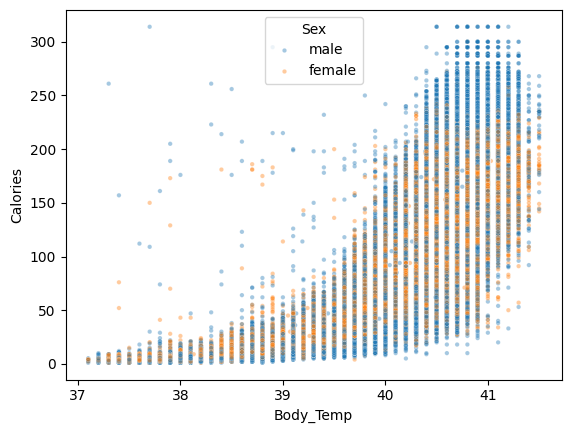

In [17]:
sns.scatterplot(train_df,y='Calories',x='Body_Temp',hue='Sex',alpha=0.4,s=10);

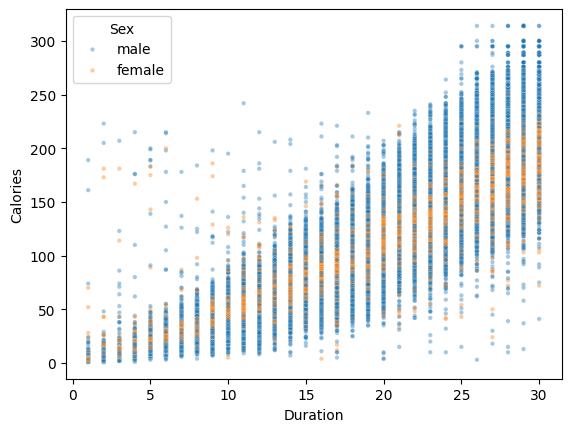

In [18]:
sns.scatterplot(train_df,y='Calories',x='Duration',hue='Sex',alpha=0.4,s=10);

<Axes: xlabel='Sex', ylabel='count'>

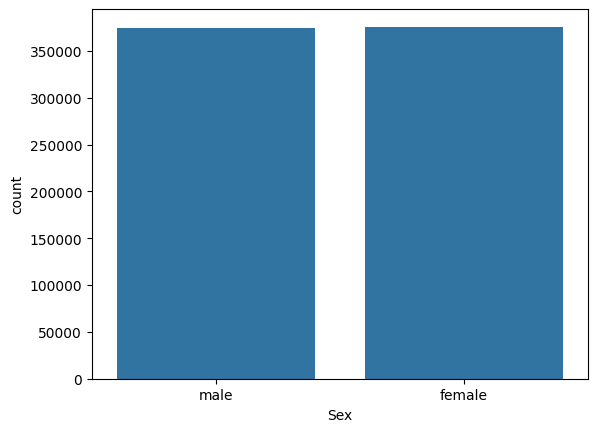

In [19]:
# sns.barplot(train_df,x='Sex',y='Calories')
sns.countplot(train_df,x='Sex')

<Axes: xlabel='Age', ylabel='count'>

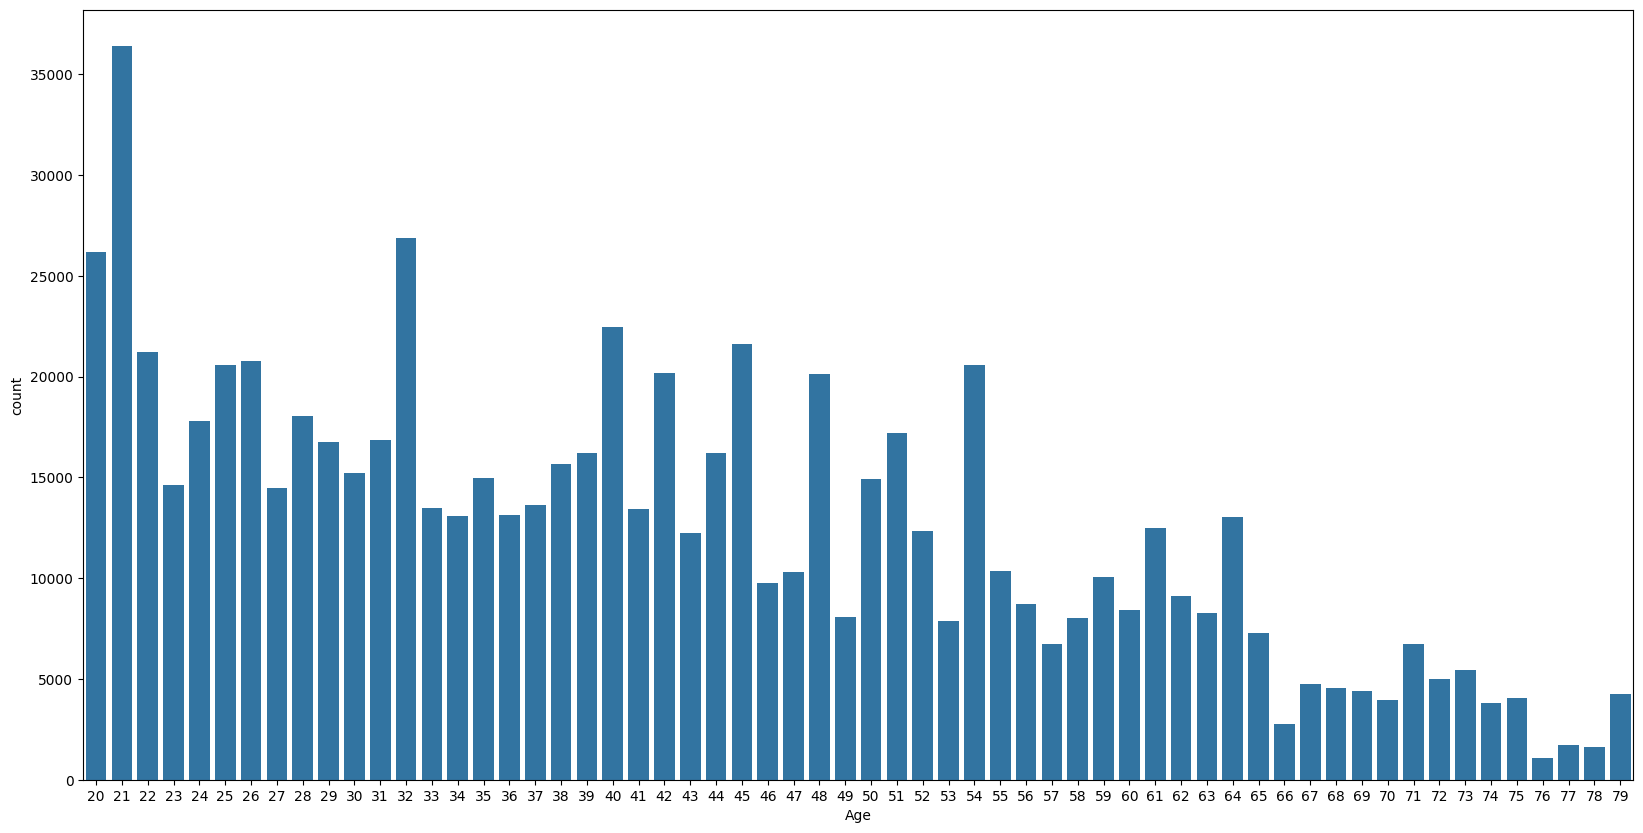

In [20]:
plt.figure(figsize=(20,10))
sns.countplot(train_df,x='Age')

<Axes: xlabel='Duration', ylabel='Calories'>

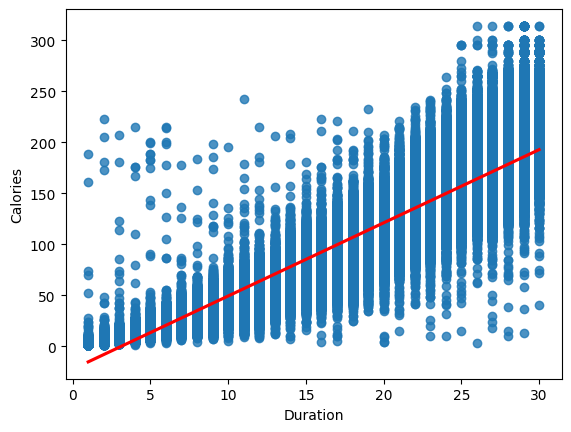

In [21]:
sns.regplot(data=train_df,x='Duration',y='Calories',scatter=True,fit_reg=True,line_kws={'color':'red'},ci=80)

In [22]:
sample_df=train_df.sample(n=100,random_state=42)
sample_df.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
404846,404846,female,56,163.0,61.0,29.0,108.0,40.8,200.0
580313,580313,male,44,179.0,87.0,13.0,94.0,40.3,64.0
552086,552086,male,41,186.0,84.0,10.0,89.0,39.9,39.0
370876,370876,female,38,161.0,58.0,19.0,98.0,40.6,103.0
239330,239330,male,57,181.0,77.0,9.0,98.0,40.0,52.0


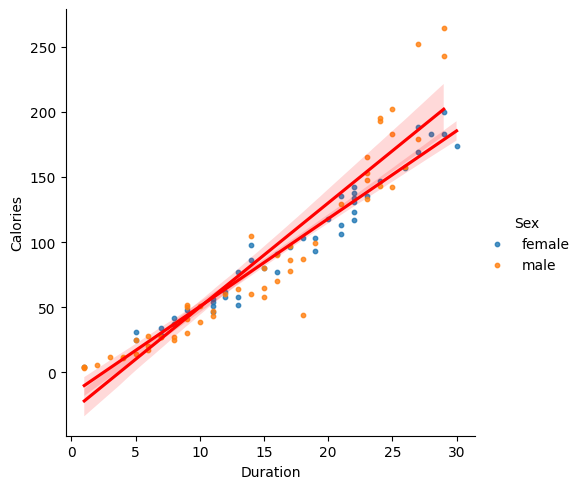

In [23]:
sns.lmplot(data=sample_df,x='Duration',y='Calories',hue='Sex',fit_reg=True,scatter_kws={'s':10},line_kws={'color':'red'})

In [24]:
columns=[items for items in train_df.columns if train_df[items].dtype!='object'and items!='id']
print(columns)
cor=train_df[columns].corr()
print(cor)

['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']
                 Age    Height    Weight  Duration  Heart_Rate  Body_Temp  \
Age         1.000000  0.011975  0.073690  0.015656    0.017037   0.030275   
Height      0.011975  1.000000  0.957967 -0.029936   -0.013234  -0.034641   
Weight      0.073690  0.957967  1.000000 -0.020845   -0.002384  -0.023717   
Duration    0.015656 -0.029936 -0.020845  1.000000    0.875327   0.903066   
Heart_Rate  0.017037 -0.013234 -0.002384  0.875327    1.000000   0.795972   
Body_Temp   0.030275 -0.034641 -0.023717  0.903066    0.795972   1.000000   
Calories    0.145683 -0.004026  0.015863  0.959908    0.908748   0.828671   

            Calories  
Age         0.145683  
Height     -0.004026  
Weight      0.015863  
Duration    0.959908  
Heart_Rate  0.908748  
Body_Temp   0.828671  
Calories    1.000000  


In [25]:
calories_df=pd.concat([train_df,test_df])
calories_df.head()
calories_df.shape
calories_df.columns

Index(['id', 'Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

In [26]:
calories_df.columns

Index(['id', 'Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

In [27]:
# Calculate the sum and count of 'Calories' for each sex
# sum_calories_by_sex = calories_df.groupby('Sex')['Calories'].transform('sum')
# count_sex = calories_df.groupby('Sex')['Calories'].transform('count')

# # Calculate the sum and count excluding the current row's value
# sum_excluding_current = sum_calories_by_sex - calories_df['Calories']
# count_excluding_current = count_sex - 1

# # Calculate the Leave-One-Out encoded value
# # Handle the case where count_excluding_current is 0 to avoid division by zero
# loo_encoded_sex = sum_excluding_current / count_excluding_current.replace(0, np.nan)

# # Fill NaN values (for categories with only one instance) with the overall mean
# overall_mean_calories = calories_df['Calories'].mean()
# calories_df['Sex_LOO_Encoded'] = loo_encoded_sex.fillna(overall_mean_calories)

# # Display the first few rows with the new LOO encoded column
# print("Train data head with LOO encoded 'Sex':")
# print(calories_df[['Sex', 'Calories', 'Sex_LOO_Encoded']].head())
# calories_df=calories_df.drop(['Sex'],axis=1)
# calories_df.head()
# calories_df.dropna()
# y=calories_df['Calories']

# one hot encoding
# calories_df=pd.get_dummies(calories_df,columns=['Sex'])

In [28]:
calories_df.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [29]:
train_df.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [30]:
demo_train_df=train_df.copy()
demo_train_df=pd.get_dummies(demo_train_df,columns=['Sex'])
demo_train_df['Sex_female']=demo_train_df['Sex_female'].astype(int)
demo_train_df['Sex_male']=demo_train_df['Sex_male'].astype(int)

demo_test_df=test_df.copy()
demo_test_df=pd.get_dummies(demo_test_df,columns=['Sex'])
demo_test_df['Sex_female']=demo_test_df['Sex_female'].astype(int)
demo_test_df['Sex_male']=demo_test_df['Sex_male'].astype(int)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error, r2_score
from sklearn.preprocessing import StandardScaler

lr=LinearRegression()
y=demo_train_df['Calories']
X=demo_train_df.drop('Calories',axis=1)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

X_scaler=StandardScaler()
y_scaler=StandardScaler()

X_train_scaled=X_scaler.fit_transform(X_train)
y_train_scaled=y_scaler.fit_transform(y_train.values.reshape(-1,1))

X_test_scaled=X_scaler.transform(X_test)

lr.fit(X_train_scaled,y_train_scaled)
y_pred_scaled=lr.predict(X_test_scaled)

y_pred=y_scaler.inverse_transform(y_pred_scaled).flatten()

y_pred

results = pd.DataFrame({
    'Actual Calories': y_test.values,
    'Predicted Calories': y_pred
})

results

# rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))

,Actual Calories,Predicted Calories
0,200.0,197.082436
1,64.0,67.288000
2,39.0,41.104971
3,103.0,103.527373
4,52.0,57.495648
...,...,...
149995,8.0,1.300570
149996,39.0,37.648916
149997,35.0,44.422125
149998,37.0,27.670832


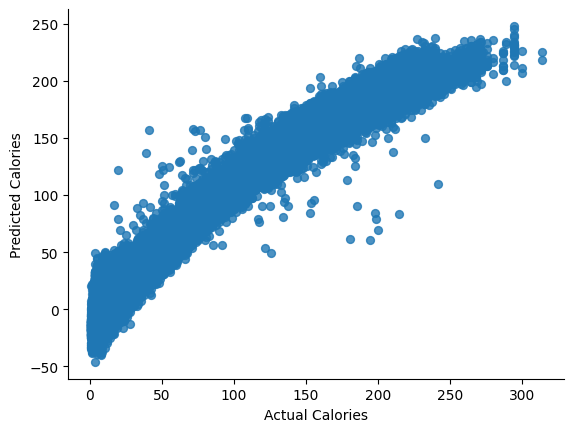

In [39]:
from matplotlib import pyplot as plt
results.plot(kind='scatter', x='Actual Calories', y='Predicted Calories', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

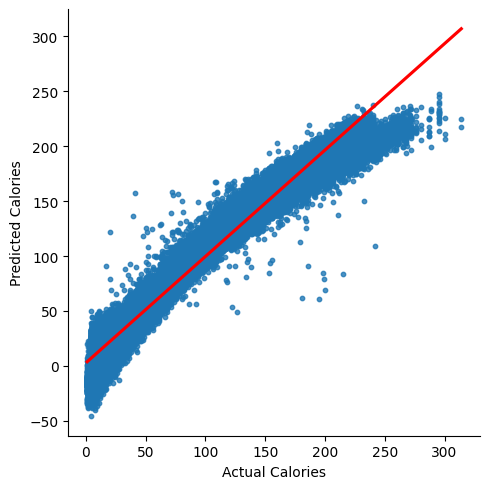

In [40]:
sns.lmplot(data=results,x='Actual Calories',y='Predicted Calories',fit_reg=True,scatter_kws={'s':10},line_kws={'color':'red'});